<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_7_%CE%A3%CE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση 7, Ανίχνευση ακμών:**

Θεωρήστε τις εικόνες αποχρώσεων του γκρι (grayscale
image) “butterfly_g.jpg”, “cameraman.bmp” και “lenna.bmp”.

**Ζητούμενα:**

**ΣΤ.**Υπολογίστε για την εικόνα “butterfly_g.jpg” τις ακμές με χρήση παραγώγων δευτέρου
βαθμού (φίλτρο LoG). Υπολογίστε πειραματικά τις βέλτιστες τιμές των παραμέτρων
της διακύμανσης και του κατωφλίου στην υλοποίηση του τελεστή LoG. Παραθέστε
ενδεικτικά αποτελέσματα και αντίστοιχο σχολιασμό τους.


**Σημείωση**

Η κάθε μέθοδος έχει τα πλεονεκτήματά και τα μειονεκτήματά της. Η επιλογή της κατάλληλης μεθόδου εξαρτάται από τα χαρακτηριστικά της εκάστοτε εφαρμογής όπως η ανίχνευση συγκεκριμένων δομών ή η ανοχή στο θόρυβο.
Στη συγκεκριμένη εικόνα μπορούμε να πούμε πως όλοι οι μέθοδοι με εξαίρεση εκείνη του Prewitt έχουν ένα αρκετά ικανοποιητικό αποτέλεσμα στην ανίχνευση των ακμών. Ο αλγόριθμος Prewitt έχει παραγάγει πυκνές ακμές σε σημείο τέτοιο που αποτελούν εισαγωγή θορύβου στην εικόνα.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Import Image**

In [ ]:
# Διαβάζουμε την εικόνα
from google.colab import drive
drive.mount('/content/drive')
image = cv2.imread('/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/butterfly_g.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Υλοποίηση φίλτρου LoG**

**Υλοποίηση συνάρτησης για την εύρεση βέλτιστων παραμέτρων**

In [ ]:
# Υλοποίηση φίλτρου LoG
def LoG_filter(image, sigma):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    return cv2.Laplacian(blurred, cv2.CV_64F)

# Υλοποίηση συνάρτησης για την εύρεση βέλτιστων παραμέτρων
def find_optimal_parameters(image):
    best_variance = 0
    best_threshold = 0
    max_edges = 0

    for variance in range(1, 10, 1):
        for threshold in range(1, 100, 5):
            edges = np.uint8(LoG_filter(image, variance))
            edges = cv2.threshold(edges, threshold, 255, cv2.THRESH_BINARY)[1]

            num_edges = np.sum(edges) / 255
            print(num_edges)

            if num_edges > max_edges:
                max_edges = num_edges
                best_variance = variance
                best_threshold = threshold

    return max_edges, best_variance, best_threshold

**Εύρεση βέλτιστων παραμέτρων**

**Εφαρμογή του LoG με τις βέλτιστες παραμέτρους**

**Εκτύπωση των βέλτιστων παραμέτρων**

In [ ]:
# Εύρεση βέλτιστων παραμέτρων
max_edges, best_variance, best_threshold = find_optimal_parameters(image)

# Εφαρμογή του LoG με τις βέλτιστες παραμέτρους
edges = np.uint8(LoG_filter(image, best_variance))
edges = cv2.threshold(edges, best_threshold, 255, cv2.THRESH_BINARY)[1]

882468.0
666384.0
615819.0
582438.0
556446.0
535959.0
519195.0
507693.0
500454.0
496374.0
494208.0
492954.0
492063.0
491592.0
491253.0
491034.0
490953.0
490938.0
490908.0
490905.0
849135.0
589254.0
511896.0
492219.0
487584.0
486792.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
486786.0
807300.0
505035.0
483639.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
483465.0
746883.0
470376.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
469551.0
691206.0
453699.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
453693.0
660708.0
444501.0
444501.0
444501.0
444501.0
444501.0
444501.0
444501.0
444501.0
444501.0
444501.0
4

**Εκτύπωση των βέλτιστων παραμέτρων**

Best Variance: 1
Best Threshold: 1
Edges found: 882468


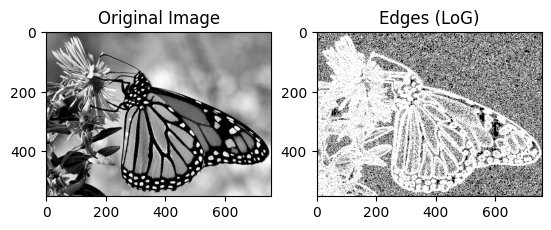

In [ ]:
# Εκτύπωση των βέλτιστων παραμέτρων
print(f"Best Variance: {best_variance}")
print(f"Best Threshold: {best_threshold}")
print(f"Edges found: {int(max_edges)}")

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges)
plt.title('Edges (LoG)')

plt.show()